In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1001,20,RL,74.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
1,1002,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2007,WD,Abnorml
2,1003,20,RL,75.0,11957,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
3,1004,90,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
4,1005,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1000 non-null   int64  
 1   MSSubClass     1000 non-null   int64  
 2   MSZoning       1000 non-null   object 
 3   LotFrontage    827 non-null    float64
 4   LotArea        1000 non-null   int64  
 5   Street         1000 non-null   object 
 6   Alley          65 non-null     object 
 7   LotShape       1000 non-null   object 
 8   LandContour    1000 non-null   object 
 9   Utilities      1000 non-null   object 
 10  LotConfig      1000 non-null   object 
 11  LandSlope      1000 non-null   object 
 12  Neighborhood   1000 non-null   object 
 13  Condition1     1000 non-null   object 
 14  Condition2     1000 non-null   object 
 15  BldgType       1000 non-null   object 
 16  HouseStyle     1000 non-null   object 
 17  OverallQual    1000 non-null   int64  
 18  OverallCo

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             460 non-null    int64  
 1   MSSubClass     460 non-null    int64  
 2   MSZoning       460 non-null    object 
 3   LotFrontage    374 non-null    float64
 4   LotArea        460 non-null    int64  
 5   Street         460 non-null    object 
 6   Alley          26 non-null     object 
 7   LotShape       460 non-null    object 
 8   LandContour    460 non-null    object 
 9   Utilities      460 non-null    object 
 10  LotConfig      460 non-null    object 
 11  LandSlope      460 non-null    object 
 12  Neighborhood   460 non-null    object 
 13  Condition1     460 non-null    object 
 14  Condition2     460 non-null    object 
 15  BldgType       460 non-null    object 
 16  HouseStyle     460 non-null    object 
 17  OverallQual    460 non-null    int64  
 18  OverallCon

In [ ]:
print(train.shape, test.shape)

(1000, 81) (460, 80)


In [ ]:
display(train.isna().sum())
display(train.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      173
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      173
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<Axes: >

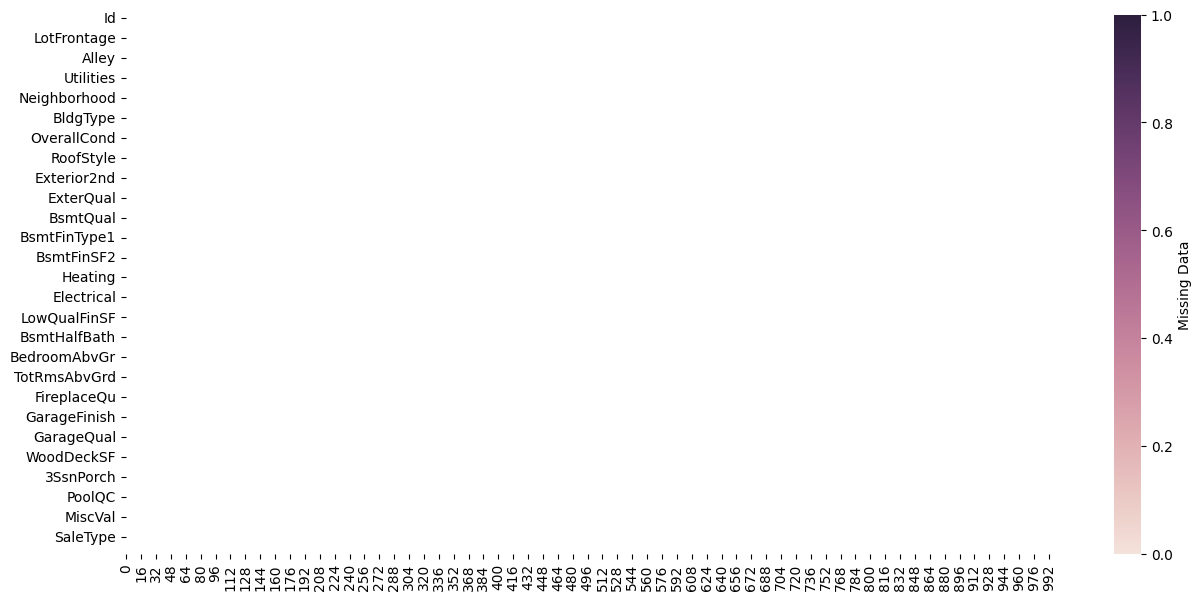

In [ ]:
plt.figure(figsize = (15, 7))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(train.isna().transpose(), cmap = cmap, cbar_kws = {'label':'Missing Data'}, linewidth = 0.5)

In [ ]:
display(train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

<Axes: >

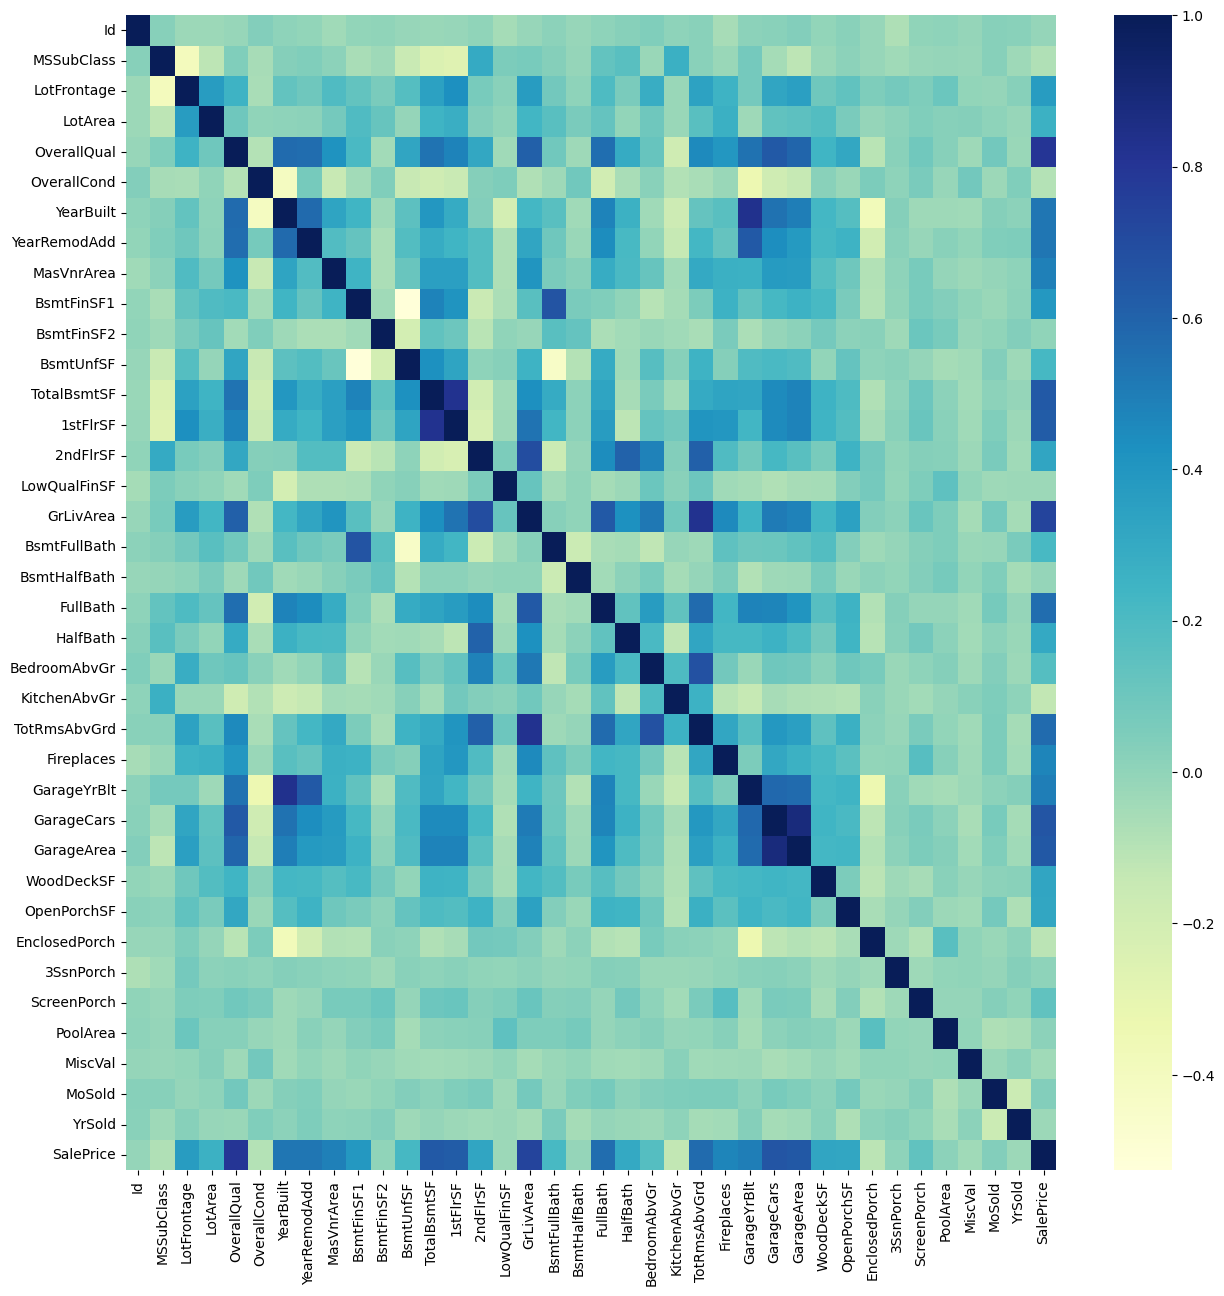

In [ ]:
plt.figure(figsize=(15,15))
corr = train.corr()
sns.heatmap(corr, cmap = "YlGnBu")

In [ ]:
categ = train.loc[:,train.dtypes == 'object'].columns
categ

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
for i in categ:
    LE = LabelEncoder()
    train[i] = LE.fit_transform(train[i])
    test[i] = LE.fit_transform(test[i])

In [ ]:
train = train.fillna(train.mean(axis=0), axis=0)
test = test.fillna(test.mean(axis=0), axis=0)

In [ ]:
#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

In [ ]:
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.01
CPU times: user 2.2 s, sys: 171 ms, total: 2.37 s
Wall time: 3.14 s


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(clf, param_grid, cv=5)

clf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'max_depth': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
print(mean_squared_error(y_test, y_pred))

1490648425.4533334


In [ ]:
y_pred_test = clf.predict(test)

y_pred_test

array([ 97000, 110000, 206000, 142600, 192500, 187000, 206000,  75000,
       206000,  85000, 116000, 136500, 206000, 206000, 125000, 206000,
       206000, 206000, 206000, 206000, 206000, 206000, 127500, 192500,
       206000, 110000, 206000, 206000, 133000,  88000, 135900, 160000,
       290000, 206000, 206000, 136500, 206000, 206000,  88000,  86000,
       206000, 187000, 206000, 206000, 755000, 160000, 206000, 206000,
       206000, 107500, 206000, 206000, 187000, 206000, 206000,  82500,
       206000, 206000, 206000, 187000, 206000, 145000, 145000, 206000,
       136500, 206000, 178000, 187000, 228950, 206000, 136000, 206000,
       108000, 173900, 206000, 163000, 206000, 206000, 141000, 206000,
       206000, 206000, 206000, 206000, 165600, 206000, 206000, 270000,
       130000, 199900,  93500, 164700, 206000, 206000, 132000, 206000,
       206000, 206000, 116000, 206000,  35311, 110000, 206000, 140000,
       112000, 206000, 206000, 206000, 173900, 206000, 206000, 187000,
      

In [ ]:
y_pred_test = pd.DataFrame(data = y_pred_test, columns=['SalePrice'])

y_pred_test = y_pred_test.reset_index()

y_pred_test.to_csv('solution.csv', index = False)

In [ ]:
test_id = test['Id']
df=pd.DataFrame({"SalePrice":y_pred_test},index = test_id)
df.to_csv('solution.csv')